In [305]:
import pickle
import numpy as np


In [248]:
model = "Qwen3-8B"
# "Qwen3-30b-moe"
# "DeepCoder-14B-Preview"
# "Qwen3-14B"
model_add = "Qwen3-14B"
model_add2 = "Qwen3-30b-moe"
# model_add = "MiMo-7B-RL"
type_cot =  'all_new'
version = 0
path = f"/data/home/vkropoti/sql_llm_answers/spider_dev_m_schema/sql_predict_{model}-reasoning-v{version}"
# f"/data/home/vkropoti/sql_llm_answers/base_reasoning/sql_all_{model}-cot_withadd_{type_cot}_think=={True}-v{version}"
# "/data/home/vkropoti/sql_llm_answers/base_reasoning/sql_think_Qwen3-8B-reasoning-v0"
# f"/data/home/vkropoti/sql_llm_answers/base_reasoning/sql_all_{model}-cot_withadd_{type_cot}_think=={True}-v{version}"

In [306]:
def load(path):
    with open(path, "rb") as fp:   # Unpickling
        sql_predict = np.array(pickle.load(fp))
    return sql_predict

In [450]:
arr_results = []
for i in range(80):
    path = f"/data/home/vkropoti/sql_llm_answers/bird_train_m_schema/sql_results_Qwen3-1.7B-reasoning-v{i}"
    arr_results.append(load(path))

In [451]:
np.mean(np.max(arr_results,axis=0))

np.float64(0.6651463725074247)

In [417]:
40*0.001

0.04

In [409]:
0.01*9500

95.0

In [250]:
all_data = load(path)

In [251]:
print(all_data[2])

SELECT `Name`, `Country`, `Age` FROM singer ORDER BY `Age` DESC;


In [252]:
k=120
print(all_data[k])
print(pred[0][k])

SELECT MIN(Weight) FROM cars_data WHERE Cylinders = 8 AND Year = 1974;
1


In [253]:
pred1 = []
for i in range(20):
    pred1.append(load(path = f"/data/home/vkropoti/sql_llm_answers/spider_dev_m_schema/sql_results_{model}-reasoning-v{i}"))

In [254]:
pred2 = []
for i in range(20):
    pred2.append(load(path = f"/data/home/vkropoti/sql_llm_answers/spider_dev_m_schema/sql_results_{model_add}-reasoning-v{i}"))

In [255]:
pred3 = []
for i in range(20):
    pred3.append(load(path = f"/data/home/vkropoti/sql_llm_answers/spider_dev_m_schema/sql_results_{model_add2}-reasoning-v{i}"))

In [256]:
import numpy as np
from scipy.stats import pearsonr

def compute_correlations(pred1, pred2):
    """
    Вычисляет попарные корреляции между элементами двух массивов,
    исключая пары с одинаковыми индексами.

    Параметры:
    pred1 (list): Список одномерных массивов.
    pred2 (list): Список одномерных массивов.

    Возвращает:
    list: Список коэффициентов корреляции для всех допустимых пар.
    """
    correlations = []
    for i in range(len(pred1)):
        for j in range(len(pred2)):
            if i != j:
                # Вычисляем корреляцию Пирсона между pred1[i] и pred2[j]
                # corr, _ = pearsonr(pred1[i], pred2[j])
                corr = np.mean(pred1[i]==pred2[j])
                correlations.append(corr)
    return np.mean(correlations)

In [257]:
compute_correlations(pred1,pred1)

np.float64(0.9212287223635297)

In [258]:
compute_correlations(pred2,pred2)

np.float64(0.9200939150851106)

In [259]:
compute_correlations(pred3,pred3)

np.float64(0.9484249657601252)

In [260]:
compute_correlations(pred1,pred2)

np.float64(0.8943406378399531)

In [261]:
compute_correlations(pred2,pred3)

np.float64(0.91377421248288)

In [262]:
compute_correlations(pred1,pred3)

np.float64(0.9086871453727254)

In [264]:
np.mean(np.max(pred1,axis=0))

np.float64(0.8382899628252788)

In [265]:
np.mean(np.max(pred2,axis=0))

np.float64(0.8494423791821561)

In [266]:
np.mean(np.max(pred3,axis=0))

np.float64(0.8317843866171004)

In [170]:
np.max(pred,axis=0)

array([1, 0, 1, ..., 0, 1, 1], shape=(1534,))

In [192]:
pred1 = load(path = f"/data/home/vkropoti/sql_llm_answers/bird_dev_m_schema/sql_results_{model}-reasoning-v{1}")

In [193]:
pred2 = load(path = f"/data/home/vkropoti/sql_llm_answers/bird_dev_m_schema/sql_results_{model}-reasoning-v{2}")

In [186]:
np.corrcoef(pred1,pred2)[0][1]

np.float64(0.7238500910389257)

In [194]:
np.corrcoef(pred1,pred2)[0][1]

np.float64(0.8222993888506518)

In [19]:
each = (pred1==1)&(pred2==1)
np.mean(each)

np.float64(0.559973924380704)

In [20]:
all_ = (pred1==1)|(pred2==1)
np.mean(all_)

np.float64(0.6629726205997393)

In [37]:
np.arange(len(pred1))[((~pred1) & pred2 | pred2 & (~pred1)).astype(bool)]
# [(~pred1) & pred2 | pred2 & (~pred1)]

array([   4,   23,   56,   57,   62,   98,  114,  161,  164,  168,  189,
        201,  219,  248,  273,  278,  315,  321,  409,  413,  474,  515,
        527,  536,  563,  599,  606,  611,  630,  637,  673,  678,  736,
        766,  772,  863,  881,  899,  907,  945,  948,  953,  954,  964,
        968,  987,  994,  996,  999, 1002, 1031, 1039, 1050, 1051, 1061,
       1093, 1153, 1160, 1165, 1201, 1216, 1242, 1244, 1249, 1289, 1297,
       1360, 1376, 1387, 1464, 1472, 1490, 1497])

In [21]:
all_

array([ True, False,  True, ..., False,  True,  True], shape=(1534,))

In [22]:
each

array([ True, False,  True, ..., False,  True,  True], shape=(1534,))

In [36]:
((~pred1) & pred2 | pred2 & (~pred1)).astype(bool)

array([False, False, False, ..., False, False, False], shape=(1534,))

In [173]:
print(sql_predict[95])

```
SELECT COUNT(DISTINCT Examination.ID) FROM Examination WHERE Thrombosis = 2 AND `ANA Pattern` = 'S' AND `aCL IgM` > (SELECT AVG(`aCL IgM`) FROM Examination) * 1.2
```


In [169]:
print(sql_predict[95])

```
SELECT COUNT(DISTINCT ID) FROM Examination WHERE Thrombosis = 2 AND `ANA Pattern` = 'S' AND `aCL IgM` > (SELECT AVG(`aCL IgM`) * 0.4 FROM Examination)
```


In [78]:
import matplotlib.pyplot as plt
import numpy as np
from transformers import AutoTokenizer
from tqdm import tqdm

In [79]:
#v2
tokenizer = AutoTokenizer.from_pretrained("/data/home/vkropoti/models/Qwen3-8B")
arr_lens = []
for i in tqdm(range(len(sql_predict))):
    res = tokenizer.tokenize(sql_predict[i])
    arr_lens.append(len(res))
    # break
    

100%|██████████| 500/500 [00:00<00:00, 6000.25it/s]


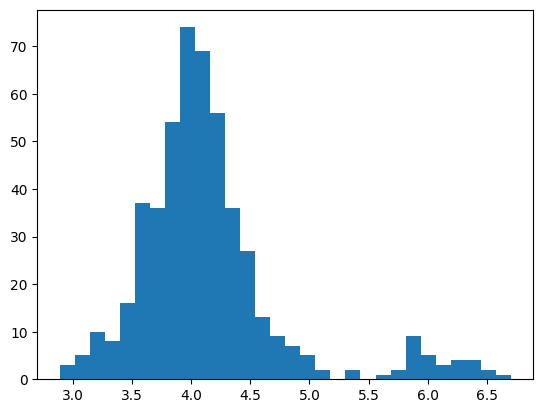

In [80]:
p = plt.hist(np.log(1+np.array(arr_lens)),bins=30)

In [67]:
print(np.exp(4))
print(np.exp(6))

54.598150033144236
403.4287934927351


## Меняем SQL all

In [300]:
def get_path(v):
    return f"/data/home/vkropoti/sql_llm_answers/bird_dev_m_schema/sql_predict_seeklhy:OmniSQL-7B-reasoning-v{v}"
    # f"/data/home/vkropoti/sql_llm_answers/base_reasoning/sql_all_Qwen3-14B-reasoning-v{v}"

def save_path(v):
    return f"/data/home/vkropoti/sql_llm_answers/bird_dev_m_schema/sql_predict_new_seeklhy:OmniSQL-7B-reasoning-v{v}"
    # f"/data/home/vkropoti/sql_llm_answers/base_reasoning/sql_all_new_Qwen3-14B-reasoning-v{v}"

In [294]:
import re
def parse_response(response):
    pattern = r"```sql\s*(.*?)\s*```"
    
    sql_blocks = re.findall(pattern, response, re.DOTALL)

    if sql_blocks:
        # Extract the last SQL query in the response text and remove extra whitespace characters
        last_sql = sql_blocks[-1].strip()
        return last_sql
    else:
        # print("No SQL blocks found.")
        return ""

In [295]:
def change_all(x):
    arr = x[8:].split('</think>')
    arr_new = ["Reasoning process:\n"] + arr[0:-1] + ["Final answer based om reasoning for this model:"] + [arr[-1]]
    return "\n".join(arr_new)

In [296]:
def change_all(x):
    return parse_response(x)

In [301]:
def change_n(n):
    for i in range(n):
        with open(get_path(i), "rb") as fp:   # Unpickling
            sql_predict = np.array(pickle.load(fp))
        arr_changed = [change_all(sql_predict[k]) for k in range(len(sql_predict))]
        with open(save_path(i), "wb") as fp:
            pickle.dump(arr_changed, fp)

In [302]:
with open(get_path(0), "rb") as fp:   # Unpickling
        sql_predict = np.array(pickle.load(fp))

In [303]:
sql_predict[0]

np.str_("SELECT \n    MAX(f.`Free Meal Count (K-12)` / f.`Enrollment (K-12)`) AS HighestEligibleFreeRate\nFROM \n    frpm AS f\nINNER JOIN \n    schools AS s\nON \n    f.CDSCode = s.CDSCode\nWHERE \n    s.County = 'Alameda';")

In [282]:
%%time
change_n(20)

CPU times: user 1.42 s, sys: 780 ms, total: 2.2 s
Wall time: 2.21 s


In [153]:
with open(get_path(0), "rb") as fp:   # Unpickling
    sql_predict = np.array(pickle.load(fp))

In [147]:
arr_changed = [change_all(sql_predict[k]) for k in range(len(sql_predict))]

In [152]:
with open(save_path(0), "wb") as fp:
    pickle.dump(arr_changed, fp)

## Смотрим зависимости

In [10]:
import pickle

In [11]:
def load_results(k,nobs,cot_type,think=False):
    with open(f"/data/home/vkropoti/sql_llm_answers/base_reasoning/sql_results_Qwen3-8B-cot_{cot_type}_think=={think}_nobs{nobs}-v{k}", "rb") as fp:
        results = np.array(pickle.load(fp))
    return results

In [12]:
def change_to_int(arr):
     new_arr = []
     for i in range(len(arr)):
        new_arr.append(int(arr[i]))
     return new_arr

In [35]:
def load_k(k,nobs,cot_type,think=False):

    paths_to_cot = []
    for i in range(nobs):
        paths_to_cot.append(f"/data/home/vkropoti/sql_llm_answers/base_reasoning/sql_results_Qwen3-8B-reasoning-v{(k+i)%50}",)

    arr_cots = []
    for path in paths_to_cot:
        with open(path, "rb") as fp: 
            arr = np.array(pickle.load(fp))
        arr = change_to_int(arr)
        arr_cots.append(arr)
    

    results = load_results(k,nobs,cot_type,think)
    results = change_to_int(results)
    
    return arr_cots, results

In [36]:
import pandas as pd
from collections import defaultdict
import itertools

def analyze_combination_dependency_pd(*base_arrays, result_array):
    """
    Анализирует зависимость результирующего массива от комбинаций входных массивов
    
    Параметры:
    *base_arrays: произвольное количество входных массивов
    result_array: результирующий массив
    
    Возвращает:
    DataFrame с анализом распределения результатов
    """
    # Проверка согласованности длин массивов
    lengths = [len(arr) for arr in base_arrays] + [len(result_array)]
    if len(set(lengths)) > 1:
        raise ValueError("Все массивы должны иметь одинаковую длину")
    
    # Создаем словарь для подсчета комбинаций
    counter = defaultdict(lambda: {'total': 0, '0': 0, '1': 0})
    
    # Собираем данные
    for elements in zip(*base_arrays, result_array):
        *input_comb, result = elements
        key = tuple(input_comb)
        counter[key]['total'] += 1
        counter[key][str(result)] += 1
    
    # Создаем DataFrame
    df = pd.DataFrame.from_dict(counter, orient='index')
    # print(df)
    df['Комбинация'] = df.index
    # df.index.names = ['Комбинация']
    df = df.reset_index()
    
    # Рассчитываем вероятности
    df['prob_0'] = df['0'] / df['total']
    df['prob_1'] = df['1'] / df['total']
    
    # Форматируем выходные данные
    df = df[[
        'Комбинация', 
        'total', 
        'prob_0', 
        'prob_1'
    ]].rename(columns={
        'total': 'Всего случаев',
        'prob_0': 'Вероятность 0',
        'prob_1': 'Вероятность 1'
    })
    
    return df.sort_values('Всего случаев', ascending=False).reset_index(drop=True)


In [37]:
import pandas as pd
import numpy as np

def aggregate_tables(tables_list, method='weighted'):
    """
    Агрегирует несколько таблиц с результатами в одну общую
    
    Параметры:
    tables_list - список DataFrame с результатами
    method - метод агрегации: 
        'weighted' - взвешенное среднее (по умолчанию)
        'mean' - простое среднее
        'full_stats' - расширенная статистика
    
    Возвращает:
    Единый агрегированный DataFrame
    """
    # Проверка входных данных
    if not all([set(df.columns) == {'Комбинация', 'Всего случаев', 'Вероятность 0', 'Вероятность 1'} 
               for df in tables_list]):
        raise ValueError("Все таблицы должны иметь идентичную структуру колонок")
    
    # Объединение всех таблиц
    combined = pd.concat(tables_list, ignore_index=True)
    
    # Группировка по комбинациям
    grouped = combined.groupby('Комбинация')
    
    if method == 'weighted':
        # Взвешенное среднее по количеству случаев
        agg_df = grouped.apply(
            lambda x: pd.Series({
                'Всего случаев': x['Всего случаев'].sum(),
                'Вероятность 0': np.average(x['Вероятность 0'], weights=x['Всего случаев']),
                'Вероятность 1': np.average(x['Вероятность 1'], weights=x['Всего случаев'])
            })
        ).reset_index()
        
    elif method == 'mean':
        # Простое среднее по всем экспериментам
        agg_df = grouped.agg({
            'Всего случаев': 'sum',
            'Вероятность 0': 'mean',
            'Вероятность 1': 'mean'
        }).reset_index()
        
    elif method == 'full_stats':
        # Расширенная статистика с сохранением структуры
        agg_df = grouped.agg({
            'Всего случаев': 'sum',
            'Вероятность 0': ['mean', 'std', 'min', 'max'],
            'Вероятность 1': ['mean', 'std', 'min', 'max']
        })
        
        # Упрощение мультииндекса колонок
        agg_df.columns = [
            'Всего случаев', 
            'Вероятность 0 (mean)', 'Вероятность 0 (std)', 
            'Вероятность 0 (min)', 'Вероятность 0 (max)',
            'Вероятность 1 (mean)', 'Вероятность 1 (std)', 
            'Вероятность 1 (min)', 'Вероятность 1 (max)'
        ]
        
        agg_df = agg_df.reset_index()
        
    else:
        raise ValueError("Допустимые методы: 'weighted', 'mean', 'full_stats'")

    # Сортировка и форматирование
    return agg_df.sort_values('Всего случаев', ascending=False) \
                .reset_index(drop=True) \
                .round(4)


In [38]:
def create_table_mean(nobs,cot_type,think=False):
    arr_tables = []
    for i in range(50):
        arr_cots, results = load_k(i,nobs,cot_type,think)
        analysis = analyze_combination_dependency_pd(*arr_cots, result_array=results)
        arr_tables.append(analysis)
    aggregated_mean = aggregate_tables(arr_tables, method='mean')
    print(sum(aggregated_mean['Всего случаев']*aggregated_mean['Вероятность 1'])/sum(aggregated_mean['Всего случаев']))
    return aggregated_mean
        

In [26]:
df = create_table_mean(2,'all_new',think=False)
df

0.53728168


,Комбинация,Всего случаев,Вероятность 0,Вероятность 1
0,"(1, 1)",11793,0.0048,0.9952
1,"(0, 0)",10515,0.9860,0.0140
2,"(0, 1)",1346,0.4410,0.5590
3,"(1, 0)",1346,0.4086,0.5914


In [27]:
df = create_table_mean(2,'predict',think=False)
df

0.532759012


,Комбинация,Всего случаев,Вероятность 0,Вероятность 1
0,"(1, 1)",11793,0.0100,0.9900
1,"(0, 0)",10515,0.9895,0.0105
2,"(0, 1)",1346,0.3788,0.6212
3,"(1, 0)",1346,0.4819,0.5181


In [31]:
df = create_table_mean(3,'all_new',think=False)
df

0.538997724


,Комбинация,Всего случаев,Вероятность 0,Вероятность 1
0,"(1, 1, 1)",11025,0.0033,0.9967
1,"(0, 0, 0)",9906,0.9905,0.0095
2,"(1, 1, 0)",768,0.2645,0.7355
3,"(0, 1, 1)",768,0.2830,0.7170
4,"(1, 0, 1)",737,0.1460,0.8540
5,"(0, 0, 1)",609,0.5544,0.4456
6,"(1, 0, 0)",609,0.6234,0.3766
7,"(0, 1, 0)",578,0.7464,0.2536


In [32]:
df = create_table_mean(3,'predict',think=False)
df

0.5391951519999999


,Комбинация,Всего случаев,Вероятность 0,Вероятность 1
0,"(1, 1, 1)",11025,0.0080,0.9920
1,"(0, 0, 0)",9906,0.9939,0.0061
2,"(1, 1, 0)",768,0.2087,0.7913
3,"(0, 1, 1)",768,0.1538,0.8462
4,"(1, 0, 1)",737,0.2170,0.7830
5,"(0, 0, 1)",609,0.6098,0.3902
6,"(1, 0, 0)",609,0.6430,0.3570
7,"(0, 1, 0)",578,0.6662,0.3338


In [41]:
df = create_table_mean(4,'all_new',think=False)
df

0.537996032


,Комбинация,Всего случаев,Вероятность 0,Вероятность 1
0,"(1, 1, 1, 1)",10482,0.0041,0.9959
1,"(0, 0, 0, 0)",9521,0.9927,0.0073
2,"(1, 1, 1, 0)",543,0.1944,0.8056
3,"(0, 1, 1, 1)",543,0.2150,0.7850
4,"(1, 0, 1, 1)",533,0.1058,0.8942
5,"(1, 1, 0, 1)",519,0.1196,0.8804
6,"(0, 0, 0, 1)",385,0.6645,0.3355
7,"(1, 0, 0, 0)",385,0.7194,0.2806
8,"(0, 0, 1, 0)",374,0.8253,0.1747
9,"(0, 1, 0, 0)",360,0.8516,0.1484


In [42]:
df = create_table_mean(4,'predict',think=False)
df

0.540190796


,Комбинация,Всего случаев,Вероятность 0,Вероятность 1
0,"(1, 1, 1, 1)",10482,0.0074,0.9926
1,"(0, 0, 0, 0)",9521,0.9955,0.0045
2,"(1, 1, 1, 0)",543,0.1554,0.8446
3,"(0, 1, 1, 1)",543,0.1240,0.8760
4,"(1, 0, 1, 1)",533,0.1192,0.8808
5,"(1, 1, 0, 1)",519,0.1060,0.8940
6,"(0, 0, 0, 1)",385,0.6956,0.3044
7,"(1, 0, 0, 0)",385,0.7851,0.2149
8,"(0, 0, 1, 0)",374,0.8032,0.1968
9,"(0, 1, 0, 0)",360,0.7934,0.2066


In [25]:
df

,Комбинация,Всего случаев,Вероятность 0,Вероятность 1
0,"(1, 1)",11793,0.0048,0.9952
1,"(0, 0)",10515,0.9860,0.0140
2,"(0, 1)",1346,0.4410,0.5590
3,"(1, 0)",1346,0.4086,0.5914


In [285]:
arr_tables_3 = []
for i in range(20):
    arr1, arr2, arr3, arr4, arr_with3, arr_with2, arr_with3_qwen = load_k(i,False)
    analysis = analyze_combination_dependency_pd(arr1, arr2, arr3, result_array=arr_with3)
    arr_tables_3.append(analysis)

In [286]:
aggregated_mean_3 = aggregate_tables(arr_tables_3, method='mean')

In [287]:
aggregated_mean_3

,Комбинация,Всего случаев,Вероятность 0,Вероятность 1
0,"(0, 0, 0)",3945,0.9835,0.0165
1,"(1, 1, 1)",2722,0.0030,0.9970
2,"(1, 0, 1)",2013,0.0774,0.9226
3,"(1, 0, 0)",399,0.5720,0.4280
4,"(0, 0, 1)",393,0.3840,0.6160
5,"(0, 1, 0)",240,0.7588,0.2412
6,"(0, 1, 1)",147,0.2320,0.7680
7,"(1, 1, 0)",141,0.2810,0.7190


In [292]:
arr_tables_2 = []
for i in range(20):
    arr1, arr2, arr3, arr4, arr_with3, arr_with2, arr_with3_qwen = load_k(i,False)
    analysis = analyze_combination_dependency_pd(arr1, arr3, arr4, result_array=arr_with2)
    arr_tables_2.append(analysis)

In [298]:
aggregated_mean_2 = aggregate_tables(arr_tables_2, method='mean')
print(sum(aggregated_mean_2['Всего случаев']*aggregated_mean_2['Вероятность 1'])/sum(aggregated_mean_2['Всего случаев']))
aggregated_mean_2

0.5346701500000001


,Комбинация,Всего случаев,Вероятность 0,Вероятность 1
0,"(1, 1, 1)",4430,0.0043,0.9957
1,"(0, 0, 0)",3942,0.9919,0.0081
2,"(1, 1, 0)",305,0.0119,0.9881
3,"(0, 1, 1)",305,0.3252,0.6748
4,"(1, 0, 1)",297,0.5248,0.4752
5,"(0, 0, 1)",243,0.9361,0.0639
6,"(1, 0, 0)",243,0.6221,0.3779
7,"(0, 1, 0)",235,0.3696,0.6304


In [294]:
arr_tables_3_qwen = []
for i in range(20):
    arr1, arr2, arr3, arr4, arr_with3, arr_with2, arr_with3_qwen = load_k(i,False)
    analysis = analyze_combination_dependency_pd(arr1, arr3, arr4, result_array=arr_with3_qwen)
    arr_tables_3_qwen.append(analysis)

In [300]:
aggregated_mean_3_qwen = aggregate_tables(arr_tables_3_qwen, method='mean')
print(sum(aggregated_mean_3_qwen['Всего случаев']*aggregated_mean_3_qwen['Вероятность 1'])/sum(aggregated_mean_3_qwen['Всего случаев']))
aggregated_mean_3_qwen

0.53516845


,Комбинация,Всего случаев,Вероятность 0,Вероятность 1
0,"(1, 1, 1)",4430,0.0050,0.9950
1,"(0, 0, 0)",3942,0.9932,0.0068
2,"(1, 1, 0)",305,0.4592,0.5408
3,"(0, 1, 1)",305,0.2055,0.7945
4,"(1, 0, 1)",297,0.1314,0.8686
5,"(0, 0, 1)",243,0.4202,0.5798
6,"(1, 0, 0)",243,0.7444,0.2556
7,"(0, 1, 0)",235,0.7924,0.2076


In [257]:
np.mean(arr_with2)

np.float64(0.546)

In [261]:
analysis = analyze_combination_dependency_pd(arr1, arr2, arr3, result_array=arr_with3)
print(np.mean(arr_with3))
analysis

0.54


,Комбинация,Всего случаев,Вероятность 0,Вероятность 1
0,"(0, 0, 0)",198,0.984848,0.015152
1,"(1, 1, 1)",144,0.000000,1.000000
2,"(1, 0, 1)",92,0.065217,0.934783
3,"(1, 0, 0)",23,0.391304,0.608696
4,"(0, 0, 1)",21,0.428571,0.571429
5,"(0, 1, 0)",11,0.727273,0.272727
6,"(0, 1, 1)",6,0.166667,0.833333
7,"(1, 1, 0)",5,0.400000,0.600000


In [263]:
analysis = analyze_combination_dependency_pd(arr1, arr3, result_array=arr_with2)
print(np.mean(arr_with2))
analysis

0.546


,Комбинация,Всего случаев,Вероятность 0,Вероятность 1
0,"(1, 1)",236,0.004237,0.995763
1,"(0, 0)",209,0.990431,0.009569
2,"(1, 0)",28,0.500000,0.500000
3,"(0, 1)",27,0.185185,0.814815


In [267]:
analysis = analyze_combination_dependency_pd(arr1, arr3, arr4, result_array=arr_with2)
print(np.mean(arr_with2))
analysis

0.546


,Комбинация,Всего случаев,Вероятность 0,Вероятность 1
0,"(1, 1, 1)",219,0.004566,0.995434
1,"(0, 0, 0)",197,0.989848,0.010152
2,"(1, 1, 0)",17,0.000000,1.000000
3,"(1, 0, 1)",16,0.437500,0.562500
4,"(0, 1, 0)",15,0.133333,0.866667
5,"(1, 0, 0)",12,0.583333,0.416667
6,"(0, 1, 1)",12,0.250000,0.750000
7,"(0, 0, 1)",12,1.000000,0.000000


In [265]:
import multiprocessing

multiprocessing.cpu_count()

96